In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [255]:
data= pd.read_excel('AirQualityUCI.xlsx')
print(data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [256]:
print(data.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200

# Data info

In [257]:
data.columns
data.info()
data['Time']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.0+ MB


0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
5       23:00:00
6       00:00:00
7       01:00:00
8       02:00:00
9       03:00:00
10      04:00:00
11      05:00:00
12      06:00:00
13      07:00:00
14      08:00:00
15      09:00:00
16      10:00:00
17      11:00:00
18      12:00:00
19      13:00:00
20      14:00:00
21      15:00:00
22      16:00:00
23      17:00:00
24      18:00:00
25      19:00:00
26      20:00:00
27      21:00:00
28      22:00:00
29      23:00:00
          ...   
9327    09:00:00
9328    10:00:00
9329    11:00:00
9330    12:00:00
9331    13:00:00
9332    14:00:00
9333    15:00:00
9334    16:00:00
9335    17:00:00
9336    18:00:00
9337    19:00:00
9338    20:00:00
9339    21:00:00
9340    22:00:00
9341    23:00:00
9342    00:00:00
9343    01:00:00
9344    02:00:00
9345    03:00:00
9346    04:00:00
9347    05:00:00
9348    06:00:00
9349    07:00:00
9350    08:00:00
9351    09:00:00
9352    10:00:00
9353    11:00:00
9354    12:00:

In [258]:
data['DateTime'] = data['Date'].astype(str)+ ' ' + data['Time'].astype(str)
data.drop(['Time'], axis=1, inplace=True)
data['DateTime'] = pd.to_datetime(data['DateTime'].astype(str), format='%Y-%m-%d %H:%M:%S')
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%Y-%m-%d')
data['Year'] = data['DateTime'].map(lambda x:x.year)
data['YearMonth'] = pd.to_datetime(data.DateTime).dt.to_period('m')

In [259]:

feature_columns = list(set(list(data.columns)) - set(['Date','YearMonth','DateTime','Year','NMHC(GT)']))
other_columns = list(set(['Date','YearMonth','Year','DateTime']))
print(data[other_columns])
print(data[feature_columns])

     YearMonth  Year       Date            DateTime
0      2004-03  2004 2004-03-10 2004-03-10 18:00:00
1      2004-03  2004 2004-03-10 2004-03-10 19:00:00
2      2004-03  2004 2004-03-10 2004-03-10 20:00:00
3      2004-03  2004 2004-03-10 2004-03-10 21:00:00
4      2004-03  2004 2004-03-10 2004-03-10 22:00:00
5      2004-03  2004 2004-03-10 2004-03-10 23:00:00
6      2004-03  2004 2004-03-11 2004-03-11 00:00:00
7      2004-03  2004 2004-03-11 2004-03-11 01:00:00
8      2004-03  2004 2004-03-11 2004-03-11 02:00:00
9      2004-03  2004 2004-03-11 2004-03-11 03:00:00
10     2004-03  2004 2004-03-11 2004-03-11 04:00:00
11     2004-03  2004 2004-03-11 2004-03-11 05:00:00
12     2004-03  2004 2004-03-11 2004-03-11 06:00:00
13     2004-03  2004 2004-03-11 2004-03-11 07:00:00
14     2004-03  2004 2004-03-11 2004-03-11 08:00:00
15     2004-03  2004 2004-03-11 2004-03-11 09:00:00
16     2004-03  2004 2004-03-11 2004-03-11 10:00:00
17     2004-03  2004 2004-03-11 2004-03-11 11:00:00
18     2004-

In [260]:
data= data.replace(-200,np.nan)
print(data.head())
print(data.isnull().any())

        Date  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10     2.6      1360.00     150.0  11.881723        1045.50   
1 2004-03-10     2.0      1292.25     112.0   9.397165         954.75   
2 2004-03-10     2.2      1402.00      88.0   8.997817         939.25   
3 2004-03-10     2.2      1375.50      80.0   9.228796         948.25   
4 2004-03-10     1.6      1272.25      51.0   6.518224         835.50   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T  \
0    166.0       1056.25    113.0       1692.00      1267.50  13.60   
1    103.0       1173.75     92.0       1558.75       972.25  13.30   
2    131.0       1140.00    114.0       1554.50      1074.00  11.90   
3    172.0       1092.00    122.0       1583.75      1203.25  11.00   
4    131.0       1205.00    116.0       1490.00      1110.00  11.15   

          RH        AH            DateTime  Year YearMonth  
0  48.875001  0.757754 2004-03-10 18:00:00  2004   2004-03  
1  47.700000

Heatmap of Missing values

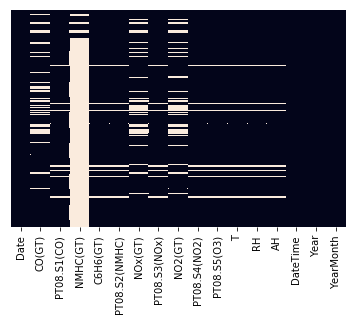

In [261]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [262]:
data.corr()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.879292  0.889734  0.931091       0.915519   
PT08.S1(CO)    0.879292     1.000000  0.790677  0.883821       0.892972   
NMHC(GT)       0.889734     0.790677  1.000000  0.902599       0.877691   
C6H6(GT)       0.931091     0.883821  0.902599  1.000000       0.981962   
PT08.S2(NMHC)  0.915519     0.892972  0.877691  0.981962       1.000000   
NOx(GT)        0.795054     0.713687  0.812685  0.718914       0.704483   
PT08.S3(NOx)  -0.703433    -0.771918 -0.771111 -0.735711      -0.796687   
NO2(GT)        0.683533     0.641696  0.731193  0.614753       0.646520   
PT08.S4(NO2)   0.630700     0.682874  0.853278  0.765717       0.777235   
PT08.S5(O3)    0.854183     0.899326  0.766731  0.865727       0.880590   
T              0.022113     0.048628  0.391730  0.198891       0.241330   
RH             0.048896     0.114607 -0.191486 -0.061643      -0.090352   
AH             0.048555     0.135323  0.269734  0.167909       0.186906   
Year          -0.041747     0.025925       NaN -0.132946      -0.146736   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
CO(GT)         0.795054     -0.703433  0.683533      0.630700     0.854183   
PT08.S1(CO)    0.713687     -0.771918  0.641696      0.682874     0.899326   
NMHC(GT)       0.812685     -0.771111  0.731193      0.853278     0.766731   
C6H6(GT)       0.718914     -0.735711  0.614753      0.765717     0.865727   
PT08.S2(NMHC)  0.704483     -0.796687  0.646520      0.777235     0.880590   
NOx(GT)        1.000000     -0.655690  0.763170      0.233777     0.787056   
PT08.S3(NOx)  -0.655690      1.000000 -0.652138     -0.538460    -0.796554   
NO2(GT)        0.763170     -0.652138  1.000000      0.157678     0.708259   
PT08.S4(NO2)   0.233777     -0.538460  0.157678      1.000000     0.591137   
PT08.S5(O3)    0.787056     -0.796554  0.708259      0.591137     1.000000   
T             -0.269713     -0.145133 -0.186369      0.561333    -0.027193   
RH             0.221022     -0.056730 -0.091845     -0.032188     0.124952   
AH            -0.149279     -0.232021 -0.334798      0.629644     0.070738   
Year           0.211689     -0.146569  0.376008     -0.498697     0.045458   

                      T        RH        AH      Year  
CO(GT)         0.022113  0.048896  0.048555 -0.041747  
PT08.S1(CO)    0.048628  0.114607  0.135323  0.025925  
NMHC(GT)       0.391730 -0.191486  0.269734       NaN  
C6H6(GT)       0.198891 -0.061643  0.167909 -0.132946  
PT08.S2(NMHC)  0.241330 -0.090352  0.186906 -0.146736  
NOx(GT)       -0.269713  0.221022 -0.149279  0.211689  
PT08.S3(NOx)  -0.145133 -0.056730 -0.232021 -0.146569  
NO2(GT)       -0.186369 -0.091845 -0.334798  0.376008  
PT08.S4(NO2)   0.561333 -0.032188  0.629644 -0.498697  
PT08.S5(O3)   -0.027193  0.124952  0.070738  0.045458  
T              1.000000 -0.578569  0.656471 -0.520318  
RH            -0.578569  1.000000  0.167971  0.102357  
AH             0.656471  0.167971  1.000000 -0.510785  
Year          -0.520318  0.102357 -0.510785  1.000000

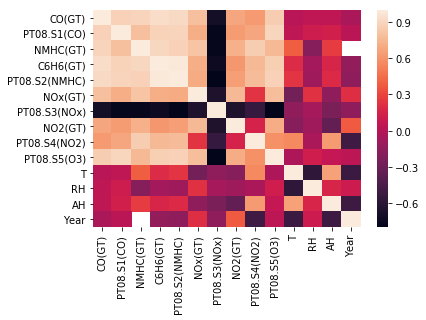

In [263]:
sns.heatmap(data.corr())

In [264]:
print(data.isnull().sum()/len(data))

Date             0.000000
CO(GT)           0.179865
PT08.S1(CO)      0.039115
NMHC(GT)         0.902319
C6H6(GT)         0.039115
PT08.S2(NMHC)    0.039115
NOx(GT)          0.175163
PT08.S3(NOx)     0.039115
NO2(GT)          0.175484
PT08.S4(NO2)     0.039115
PT08.S5(O3)      0.039115
T                0.039115
RH               0.039115
AH               0.039115
DateTime         0.000000
Year             0.000000
YearMonth        0.000000
dtype: float64


In [265]:
data.drop(['NMHC(GT)'], axis= 1, inplace= True)

In [266]:
data.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  7674.000000  8991.000000  8991.000000    8991.000000  7718.000000   
mean      2.152750  1099.707856    10.082993     939.029205   246.881252   
std       1.453252   217.084571     7.449640     266.829000   212.971224   
min       0.100000   647.250000     0.149048     383.250000     2.000000   
25%       1.100000   936.750000     4.436942     734.375000    98.000000   
50%       1.800000  1063.000000     8.239851     909.000000   179.800000   
75%       2.900000  1231.250000    13.988478    1116.250000   326.000000   
max      11.900000  2039.750000    63.741476    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   8991.000000  7715.000000   8991.000000  8991.000000  8991.000000   
mean     835.370973   113.075515   1456.143486  1022.780725    18.316054   
std      256.815106    48.359250    346.204540   398.480897     8.832888   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      657.875000    78.000000   1226.625000   731.375000    11.787500   
50%      805.500000   109.000000   1462.750000   963.250000    17.750000   
75%      969.250000   142.000000   1673.500000  1273.375000    24.400000   
max     2682.750000   339.700000   2775.000000  2522.750000    44.600000   

                RH           AH         Year  
count  8991.000000  8991.000000  9357.000000  
mean     49.232360     1.025530  2004.240141  
std      17.316389     0.403813     0.427192  
min       9.175000     0.184679  2004.000000  
25%      35.812500     0.736769  2004.000000  
50%      49.550000     0.995395  2004.000000  
75%      62.500001     1.313701  2004.000000  
max      88.725000     2.231036  2005.000000

In [267]:
data.isnull().sum()

Date                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
Year                0
YearMonth           0
dtype: int64

# Data Cleaning

In [268]:
data['CO(GT)'] = data['CO(GT)'].fillna(method='ffill')
data['PT08.S1(CO)'] = data.groupby("Date")['PT08.S1(CO)'].fillna(data['PT08.S1(CO)'].mean())
data['C6H6(GT)'] = data.groupby("Date")['C6H6(GT)'].fillna(data['C6H6(GT)'].mean())
data['PT08.S2(NMHC)'] = data.groupby("Date")['PT08.S2(NMHC)'].fillna(data['PT08.S2(NMHC)'].mean())
data['NOx(GT)'] = data.groupby("Date")['NOx(GT)'].fillna(data['NOx(GT)'].mean())
data['PT08.S3(NOx)'] = data.groupby("Date")['PT08.S3(NOx)'].fillna(data['PT08.S3(NOx)'].mean())
data['NO2(GT)'] = data.groupby("Date")['NO2(GT)'].fillna(data['NO2(GT)'].mean())
data['PT08.S4(NO2)'] = data.groupby("Date")['PT08.S4(NO2)'].fillna(data['PT08.S4(NO2)'].mean())

In [269]:
data

Date  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
0    2004-03-10     2.6  1360.000000  11.881723    1045.500000  166.000000   
1    2004-03-10     2.0  1292.250000   9.397165     954.750000  103.000000   
2    2004-03-10     2.2  1402.000000   8.997817     939.250000  131.000000   
3    2004-03-10     2.2  1375.500000   9.228796     948.250000  172.000000   
4    2004-03-10     1.6  1272.250000   6.518224     835.500000  131.000000   
5    2004-03-10     1.2  1197.000000   4.741012     750.250000   89.000000   
6    2004-03-11     1.2  1185.000000   3.624399     689.500000   62.000000   
7    2004-03-11     1.0  1136.250000   3.326677     672.000000   62.000000   
8    2004-03-11     0.9  1094.000000   2.339416     608.500000   45.000000   
9    2004-03-11     0.6  1009.750000   1.696658     560.750000  246.881252   
10   2004-03-11     0.6  1011.000000   1.293620     526.750000   21.000000   
11   2004-03-11     0.7  1066.000000   1.133431     512.000000   16.000000   
12   2004-03-11     0.7  1051.750000   1.603768     553.250000   34.000000   
13   2004-03-11     1.1  1144.000000   3.243618     667.000000   98.000000   
14   2004-03-11     2.0  1333.250000   8.013773     899.750000  174.000000   
15   2004-03-11     2.2  1351.000000   9.540643     960.250000  129.000000   
16   2004-03-11     1.7  1233.250000   6.335782     827.250000  112.000000   
17   2004-03-11     1.5  1178.750000   4.971584     762.000000   95.000000   
18   2004-03-11     1.6  1236.000000   5.216919     774.250000  104.000000   
19   2004-03-11     1.9  1285.500000   7.269933     868.500000  146.000000   
20   2004-03-11     2.9  1371.000000  11.539007    1033.500000  207.000000   
21   2004-03-11     2.2  1310.000000   8.826223     932.500000  184.000000   
22   2004-03-11     2.2  1291.750000   8.301413     911.500000  193.000000   
23   2004-03-11     2.9  1383.000000  11.151581    1019.750000  243.000000   
24   2004-03-11     4.8  1580.750000  20.799217    1318.500000  281.000000   
25   2004-03-11     6.9  1775.500000  27.359807    1487.750000  383.000000   
26   2004-03-11     6.1  1640.000000  24.017757    1404.000000  351.000000   
27   2004-03-11     3.9  1312.750000  12.779368    1076.250000  240.000000   
28   2004-03-11     1.5   964.500000   4.707072     748.500000   94.000000   
29   2004-03-11     1.0   912.750000   2.645722     629.250000   47.000000   
...         ...     ...          ...        ...            ...         ...   
9327 2005-04-03     1.2  1022.250000   4.082095     715.250000  191.900000   
9328 2005-04-03     1.4   970.250000   3.402194     676.500000  166.400000   
9329 2005-04-03     1.3   999.750000   5.313402     779.000000  171.300000   
9330 2005-04-03     1.4   996.000000   5.349138     780.750000  177.000000   
9331 2005-04-03     1.0   928.000000   3.817080     700.500000  118.700000   
9332 2005-04-03     1.0   932.750000   4.201281     721.750000  120.600000   
9333 2005-04-03     1.1   956.000000   5.395234     783.000000  141.900000   
9334 2005-04-03     1.3   967.500000   6.313819     826.250000  197.300000   
9335 2005-04-03     1.4   952.500000   6.101377     816.500000  241.800000   
9336 2005-04-03     1.2  1014.666667   4.594689     742.666667  190.100000   
9337 2005-04-03     2.7  1248.000000  11.109658    1018.250000  367.400000   
9338 2005-04-03     2.5  1180.250000   7.868564     893.750000  355.000000   
9339 2005-04-03     1.5  1101.750000   5.999005     811.750000  235.200000   
9340 2005-04-03     1.6  1115.500000   5.817660     803.250000  232.700000   
9341 2005-04-03     1.2  1099.750000   5.106145     768.750000  170.100000   
9342 2005-04-04     0.9  1012.000000   3.504006     682.500000  117.200000   
9343 2005-04-04     0.6   944.250000   1.931932     579.000000   69.600000   
9344 2005-04-04     0.5   911.750000   1.489323     543.750000   69.000000   
9345 2005-04-04     0.4   887.000000   1.086365     507.500000   61.700000   
9346 2005-04-04     0.4   864.250

In [270]:
data.isnull().sum()

Date               0
CO(GT)             0
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)      366
T                366
RH               366
AH               366
DateTime           0
Year               0
YearMonth          0
dtype: int64

In [271]:
data = data.fillna(method='ffill')

In [272]:
data.isnull().any()

Date             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
DateTime         False
Year             False
YearMonth        False
dtype: bool

In [273]:
print(data['AH'])
print(data['RH'])

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
5       0.784772
6       0.760312
7       0.770238
8       0.764819
9       0.751657
10      0.746495
11      0.736560
12      0.735295
13      0.741736
14      0.740795
15      0.769111
16      0.755183
17      0.735161
18      0.795054
19      0.839268
20      0.873589
21      0.877784
22      0.856938
23      0.818501
24      0.806544
25      0.831921
26      0.813314
27      0.741924
28      0.690484
29      0.665744
          ...   
9327    0.620458
9328    0.587528
9329    0.567283
9330    0.559414
9331    0.530155
9332    0.500166
9333    0.462436
9334    0.419179
9335    0.386566
9336    0.594491
9337    0.760784
9338    0.807281
9339    0.864238
9340    0.857933
9341    0.849727
9342    0.827454
9343    0.805778
9344    0.792730
9345    0.788769
9346    0.774275
9347    0.754964
9348    0.753129
9349    0.744608
9350    0.755337
9351    0.748652
9352    0.756824
9353    0.711864
9354    0.6406

# Data Exploration

array([<matplotlib.axes._subplots.AxesSubplot object at 0x3457AA50>,
      dtype=object)

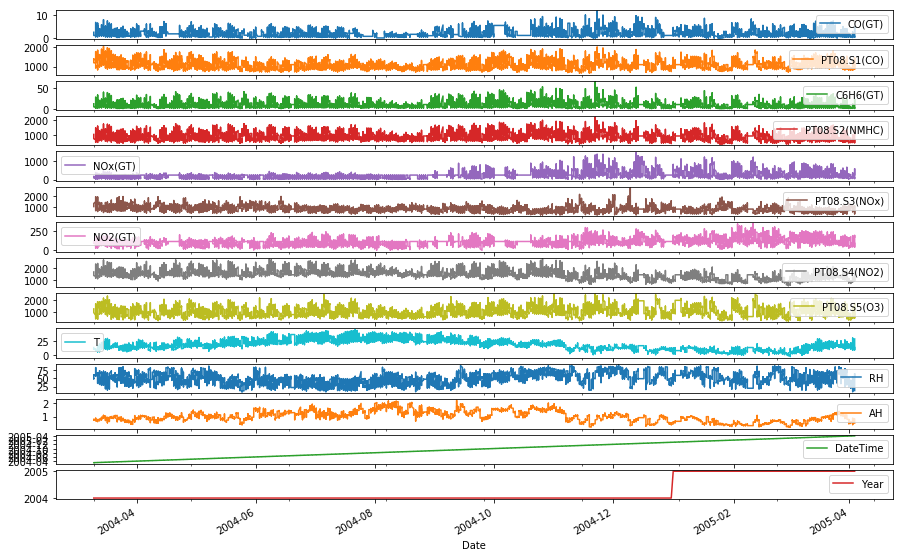

In [274]:
data.plot(x='Date',subplots=True, figsize=(15, 10))

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


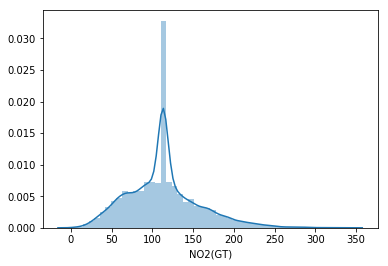

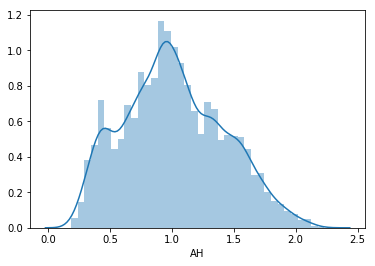

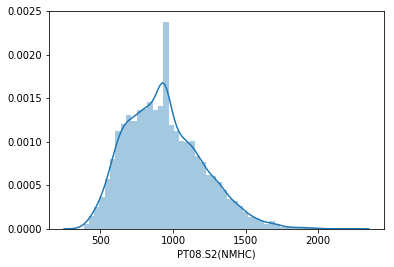

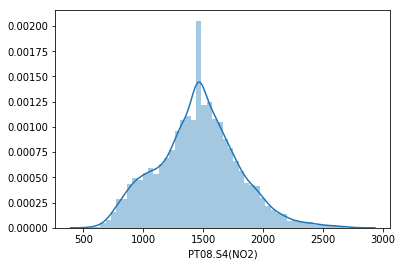

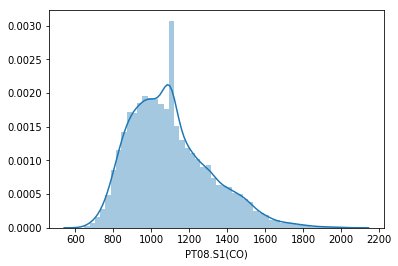

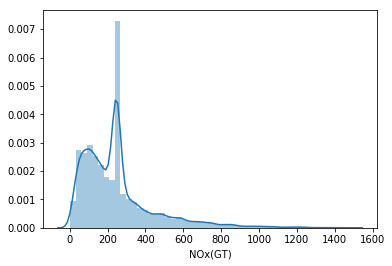

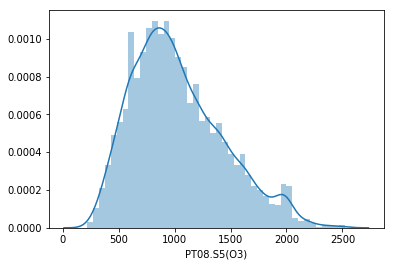

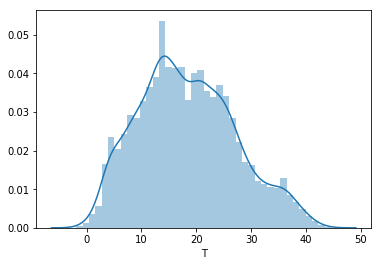

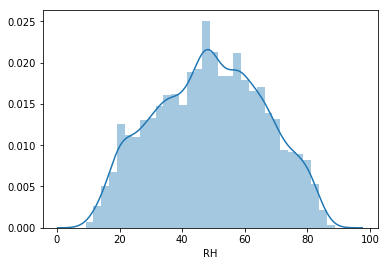

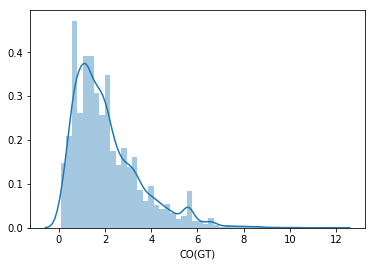

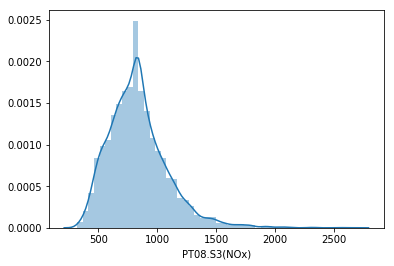

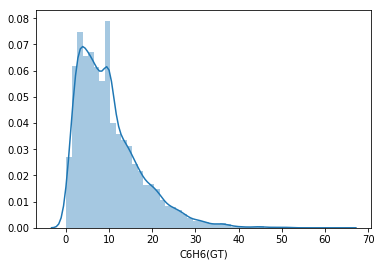

<Figure size 432x288 with 0 Axes>

In [275]:
for i in feature_columns:
    
    sns.distplot(data[i])
    plt.figure()
    plt.savefig('normalhist'+i+'.jpg')

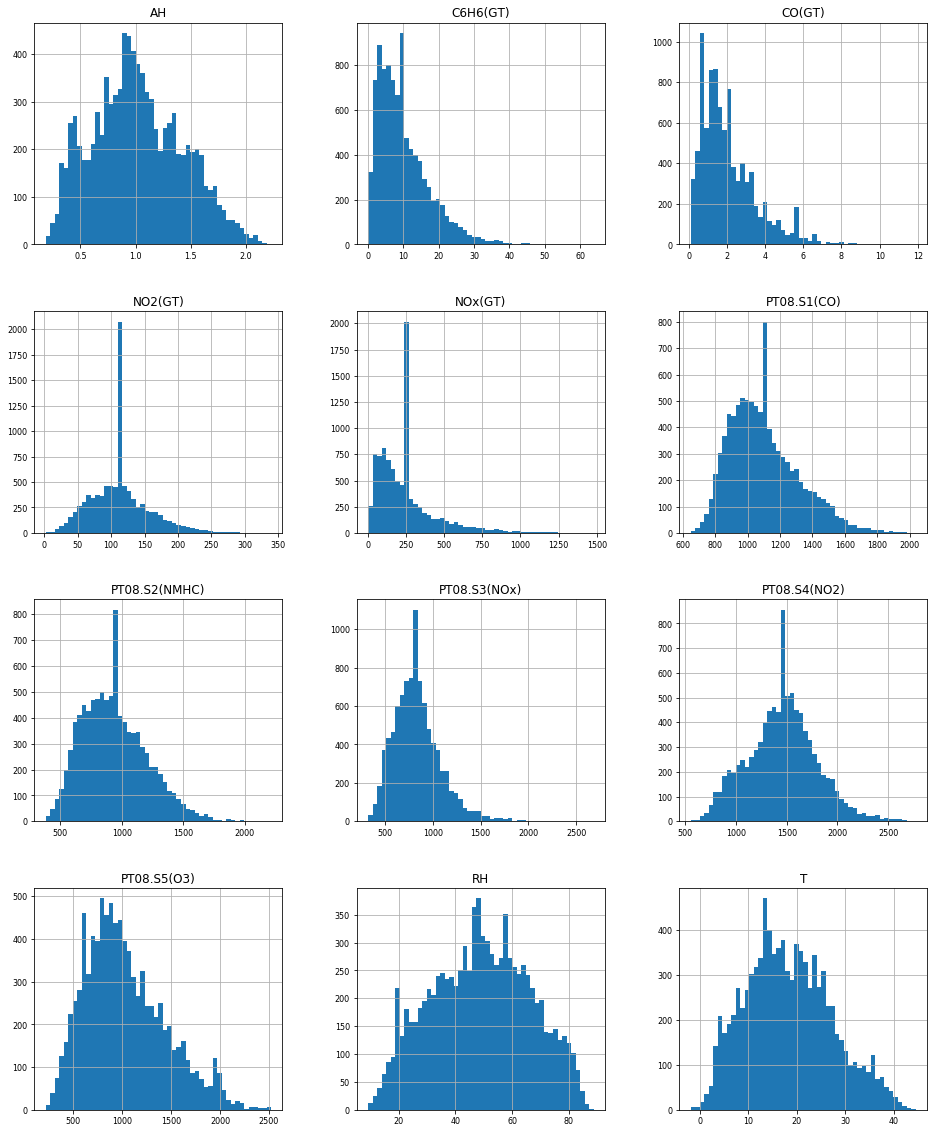

<Figure size 432x288 with 0 Axes>

In [276]:
data[feature_columns].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()
plt.savefig('normalall.jpg')

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

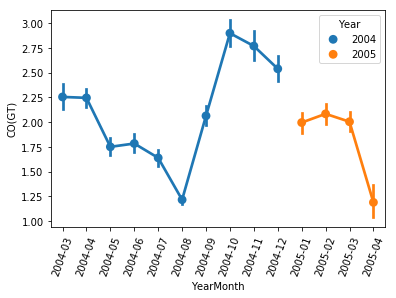

In [277]:
sns.pointplot(x="YearMonth", y="CO(GT)", hue="Year", data=data)
plt.xticks(rotation=70)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

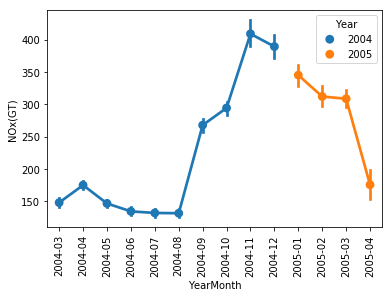

In [278]:
sns.pointplot(x="YearMonth", y="NOx(GT)", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

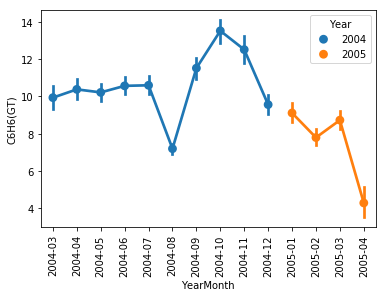

In [279]:
sns.pointplot(x="YearMonth", y="C6H6(GT)", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

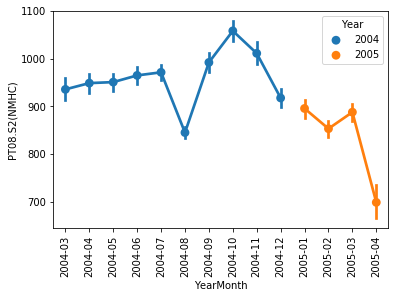

In [280]:
sns.pointplot(x="YearMonth", y="PT08.S2(NMHC)", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

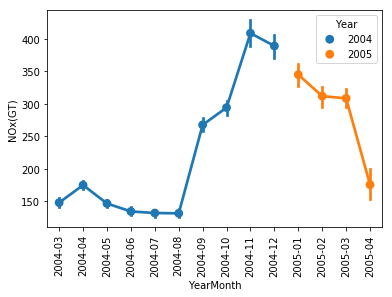

In [281]:
sns.pointplot(x="YearMonth", y="NOx(GT)", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

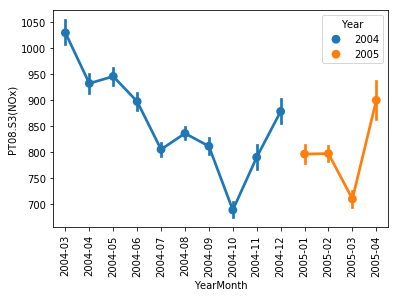

In [282]:
sns.pointplot(x="YearMonth", y="PT08.S3(NOx)", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

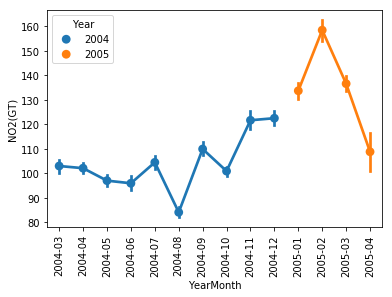

In [283]:
sns.pointplot(x="YearMonth", y="NO2(GT)", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

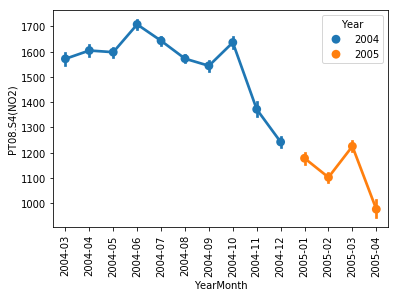

In [284]:
sns.pointplot(x="YearMonth", y="PT08.S4(NO2)", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

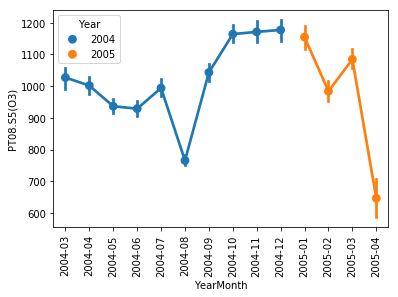

In [285]:
sns.pointplot(x="YearMonth", y="PT08.S5(O3)", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

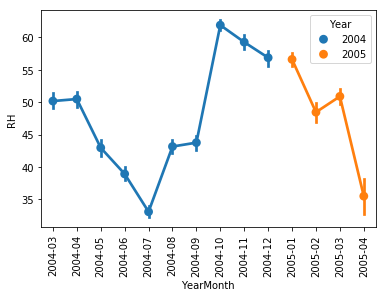

In [286]:
sns.pointplot(x="YearMonth", y="RH", hue="Year", data=data)
plt.xticks(rotation=90)

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

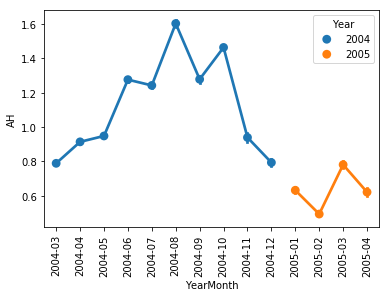

In [287]:
sns.pointplot(x="YearMonth", y="AH", hue="Year", data=data)
plt.xticks(rotation=90)

In [288]:
data

Date  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
0    2004-03-10     2.6  1360.000000  11.881723    1045.500000  166.000000   
1    2004-03-10     2.0  1292.250000   9.397165     954.750000  103.000000   
2    2004-03-10     2.2  1402.000000   8.997817     939.250000  131.000000   
3    2004-03-10     2.2  1375.500000   9.228796     948.250000  172.000000   
4    2004-03-10     1.6  1272.250000   6.518224     835.500000  131.000000   
5    2004-03-10     1.2  1197.000000   4.741012     750.250000   89.000000   
6    2004-03-11     1.2  1185.000000   3.624399     689.500000   62.000000   
7    2004-03-11     1.0  1136.250000   3.326677     672.000000   62.000000   
8    2004-03-11     0.9  1094.000000   2.339416     608.500000   45.000000   
9    2004-03-11     0.6  1009.750000   1.696658     560.750000  246.881252   
10   2004-03-11     0.6  1011.000000   1.293620     526.750000   21.000000   
11   2004-03-11     0.7  1066.000000   1.133431     512.000000   16.000000   
12   2004-03-11     0.7  1051.750000   1.603768     553.250000   34.000000   
13   2004-03-11     1.1  1144.000000   3.243618     667.000000   98.000000   
14   2004-03-11     2.0  1333.250000   8.013773     899.750000  174.000000   
15   2004-03-11     2.2  1351.000000   9.540643     960.250000  129.000000   
16   2004-03-11     1.7  1233.250000   6.335782     827.250000  112.000000   
17   2004-03-11     1.5  1178.750000   4.971584     762.000000   95.000000   
18   2004-03-11     1.6  1236.000000   5.216919     774.250000  104.000000   
19   2004-03-11     1.9  1285.500000   7.269933     868.500000  146.000000   
20   2004-03-11     2.9  1371.000000  11.539007    1033.500000  207.000000   
21   2004-03-11     2.2  1310.000000   8.826223     932.500000  184.000000   
22   2004-03-11     2.2  1291.750000   8.301413     911.500000  193.000000   
23   2004-03-11     2.9  1383.000000  11.151581    1019.750000  243.000000   
24   2004-03-11     4.8  1580.750000  20.799217    1318.500000  281.000000   
25   2004-03-11     6.9  1775.500000  27.359807    1487.750000  383.000000   
26   2004-03-11     6.1  1640.000000  24.017757    1404.000000  351.000000   
27   2004-03-11     3.9  1312.750000  12.779368    1076.250000  240.000000   
28   2004-03-11     1.5   964.500000   4.707072     748.500000   94.000000   
29   2004-03-11     1.0   912.750000   2.645722     629.250000   47.000000   
...         ...     ...          ...        ...            ...         ...   
9327 2005-04-03     1.2  1022.250000   4.082095     715.250000  191.900000   
9328 2005-04-03     1.4   970.250000   3.402194     676.500000  166.400000   
9329 2005-04-03     1.3   999.750000   5.313402     779.000000  171.300000   
9330 2005-04-03     1.4   996.000000   5.349138     780.750000  177.000000   
9331 2005-04-03     1.0   928.000000   3.817080     700.500000  118.700000   
9332 2005-04-03     1.0   932.750000   4.201281     721.750000  120.600000   
9333 2005-04-03     1.1   956.000000   5.395234     783.000000  141.900000   
9334 2005-04-03     1.3   967.500000   6.313819     826.250000  197.300000   
9335 2005-04-03     1.4   952.500000   6.101377     816.500000  241.800000   
9336 2005-04-03     1.2  1014.666667   4.594689     742.666667  190.100000   
9337 2005-04-03     2.7  1248.000000  11.109658    1018.250000  367.400000   
9338 2005-04-03     2.5  1180.250000   7.868564     893.750000  355.000000   
9339 2005-04-03     1.5  1101.750000   5.999005     811.750000  235.200000   
9340 2005-04-03     1.6  1115.500000   5.817660     803.250000  232.700000   
9341 2005-04-03     1.2  1099.750000   5.106145     768.750000  170.100000   
9342 2005-04-04     0.9  1012.000000   3.504006     682.500000  117.200000   
9343 2005-04-04     0.6   944.250000   1.931932     579.000000   69.600000   
9344 2005-04-04     0.5   911.750000   1.489323     543.750000   69.000000   
9345 2005-04-04     0.4   887.000000   1.086365     507.500000   61.700000   
9346 2005-04-04     0.4   864.250

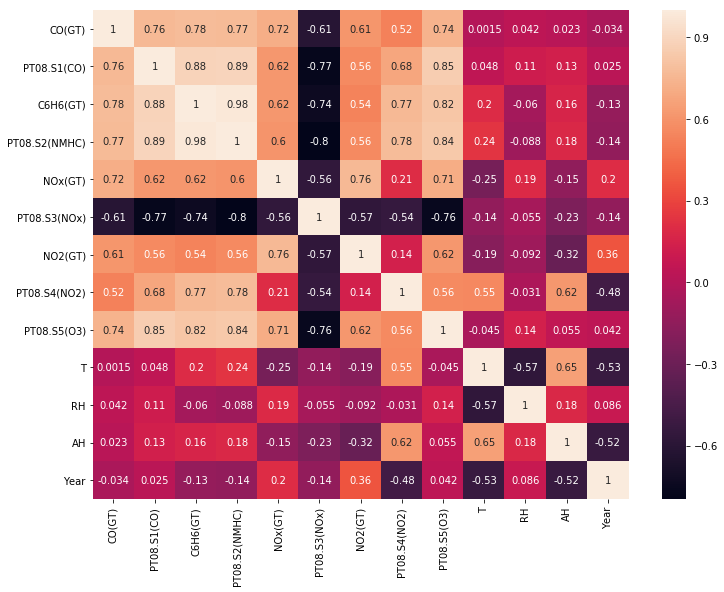

In [289]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True)

<Figure size 864x648 with 0 Axes>

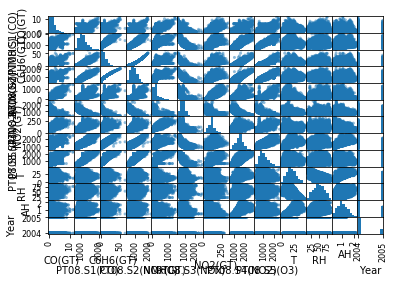

In [290]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(12,9))
scatter_matrix(data)
plt.show()

Pair Plot

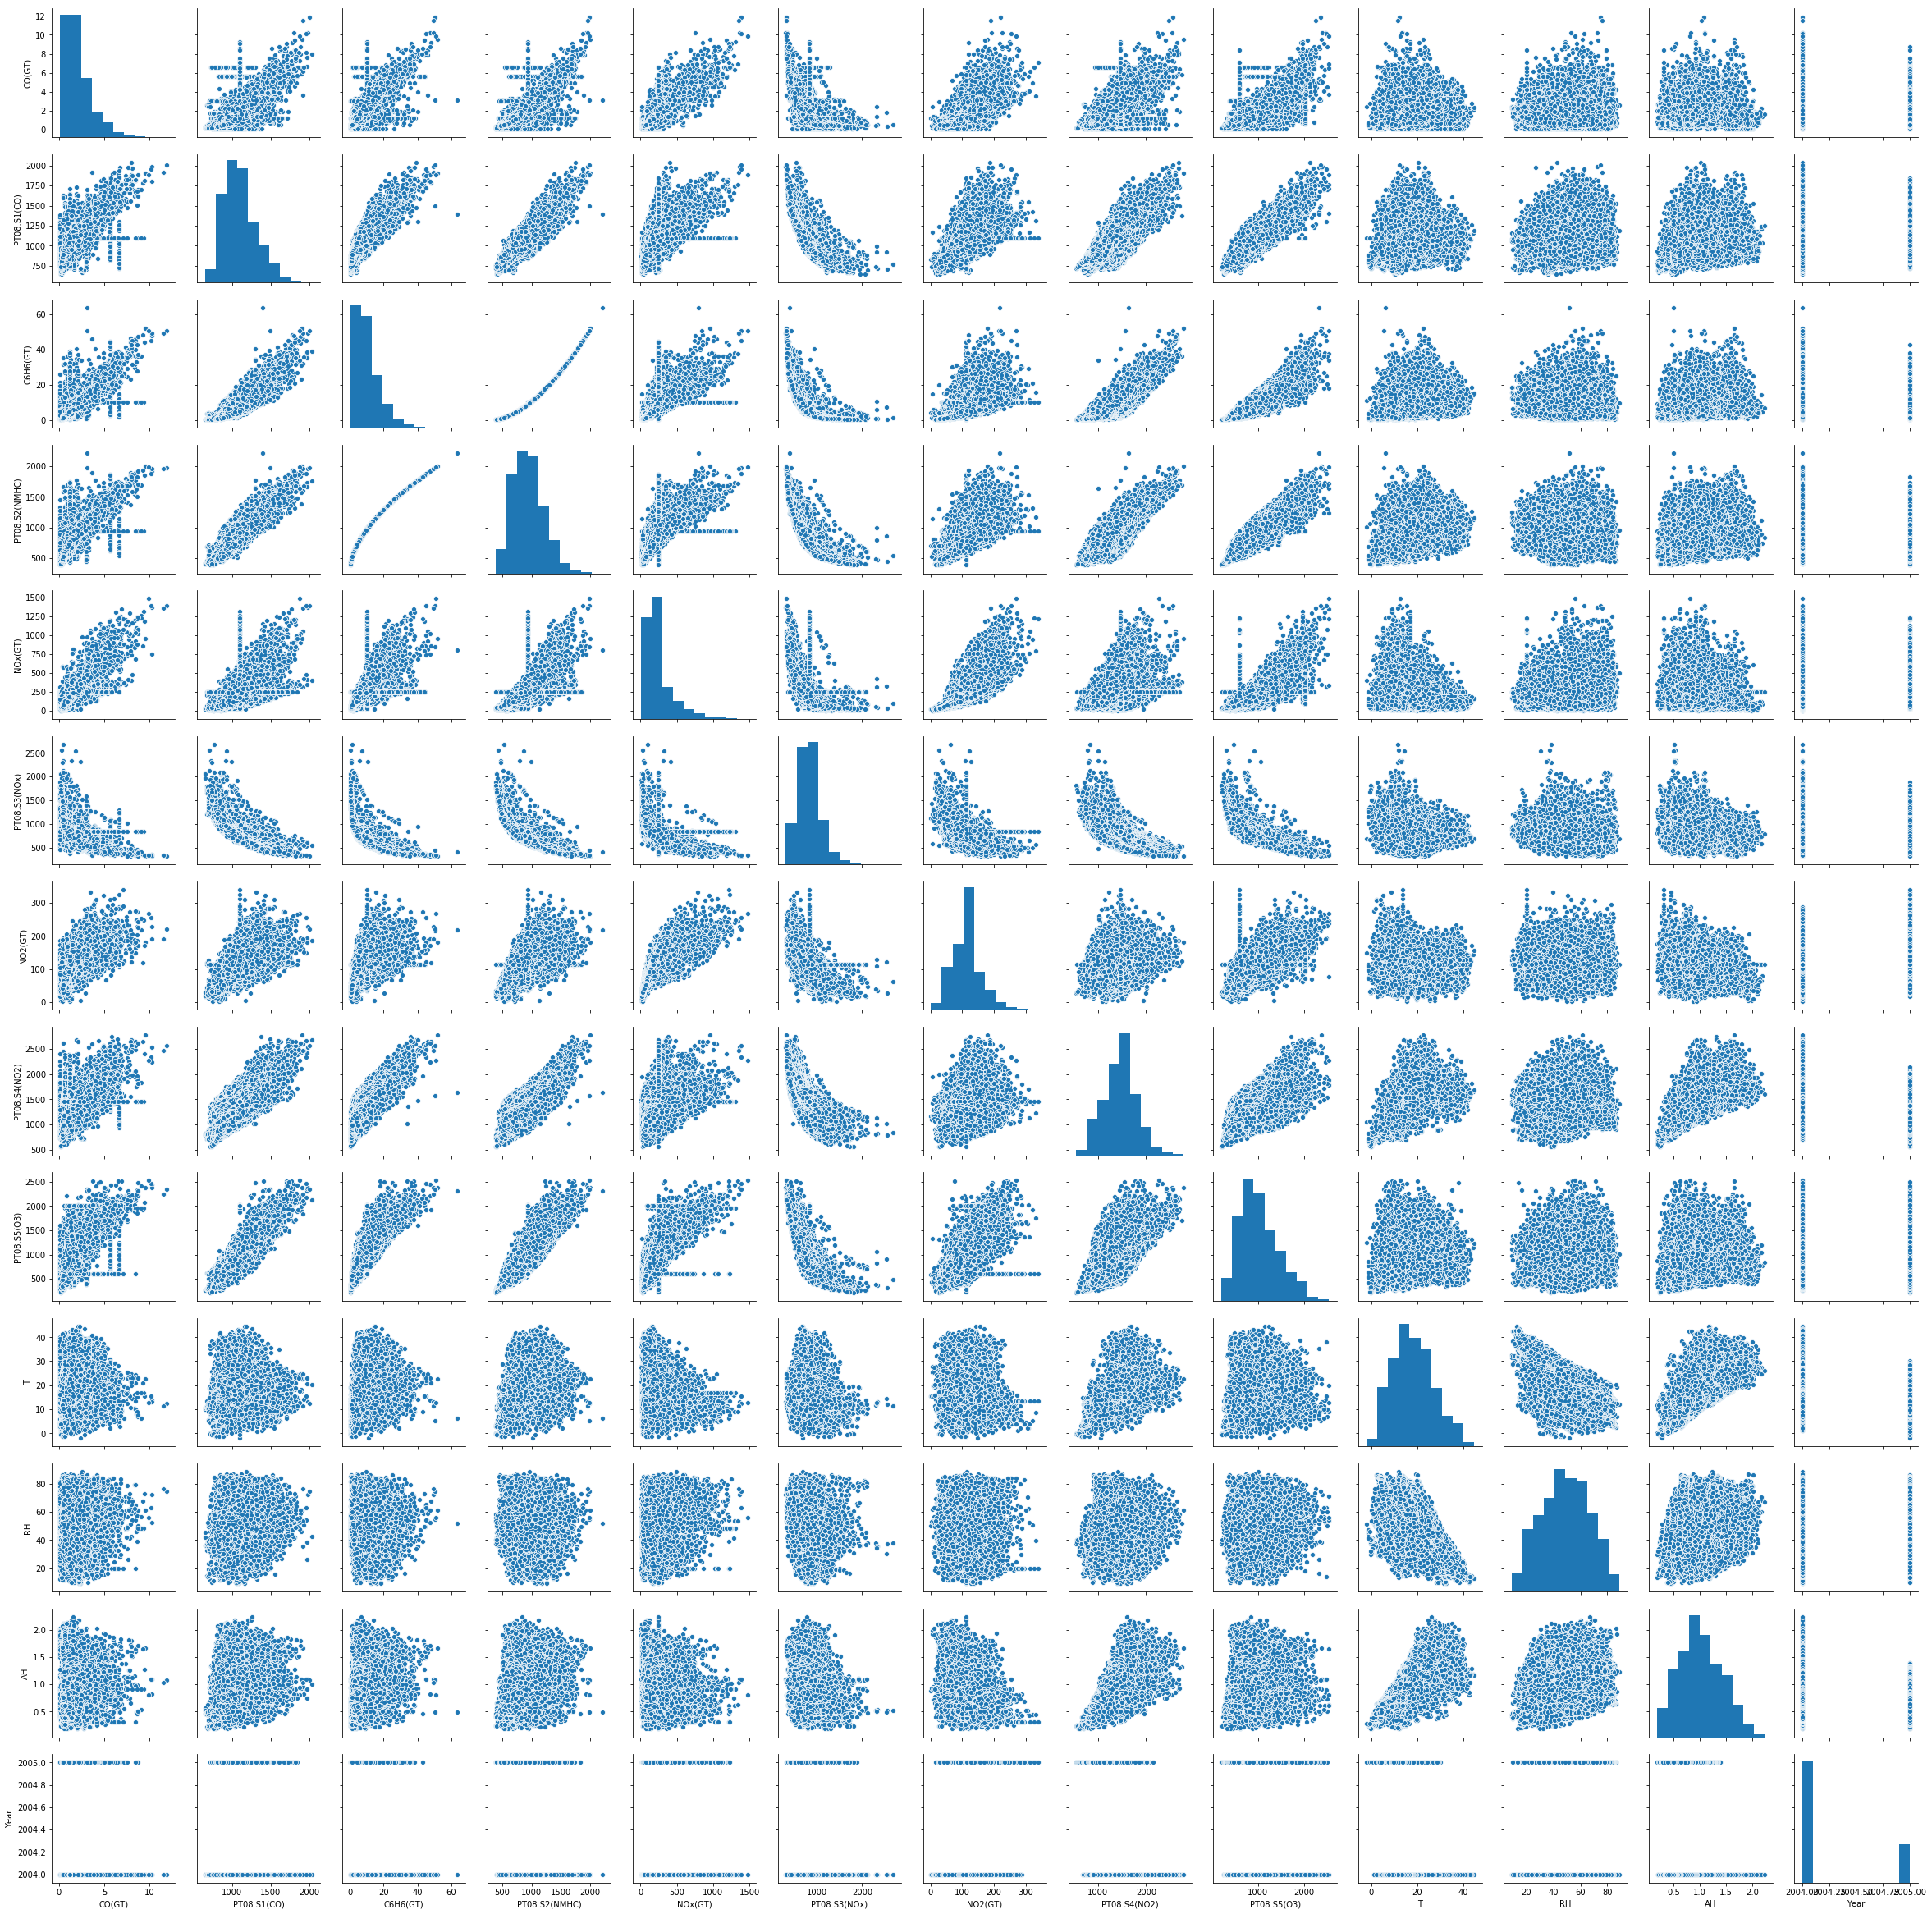

In [291]:
sns.pairplot(data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

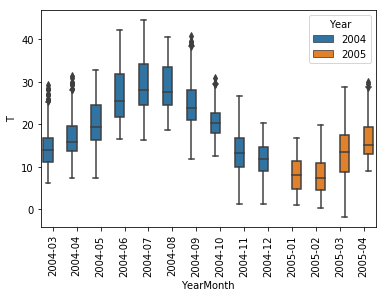

In [292]:
sns.boxplot(x="YearMonth", y="T", hue="Year", data=data)
plt.xticks(rotation=90)

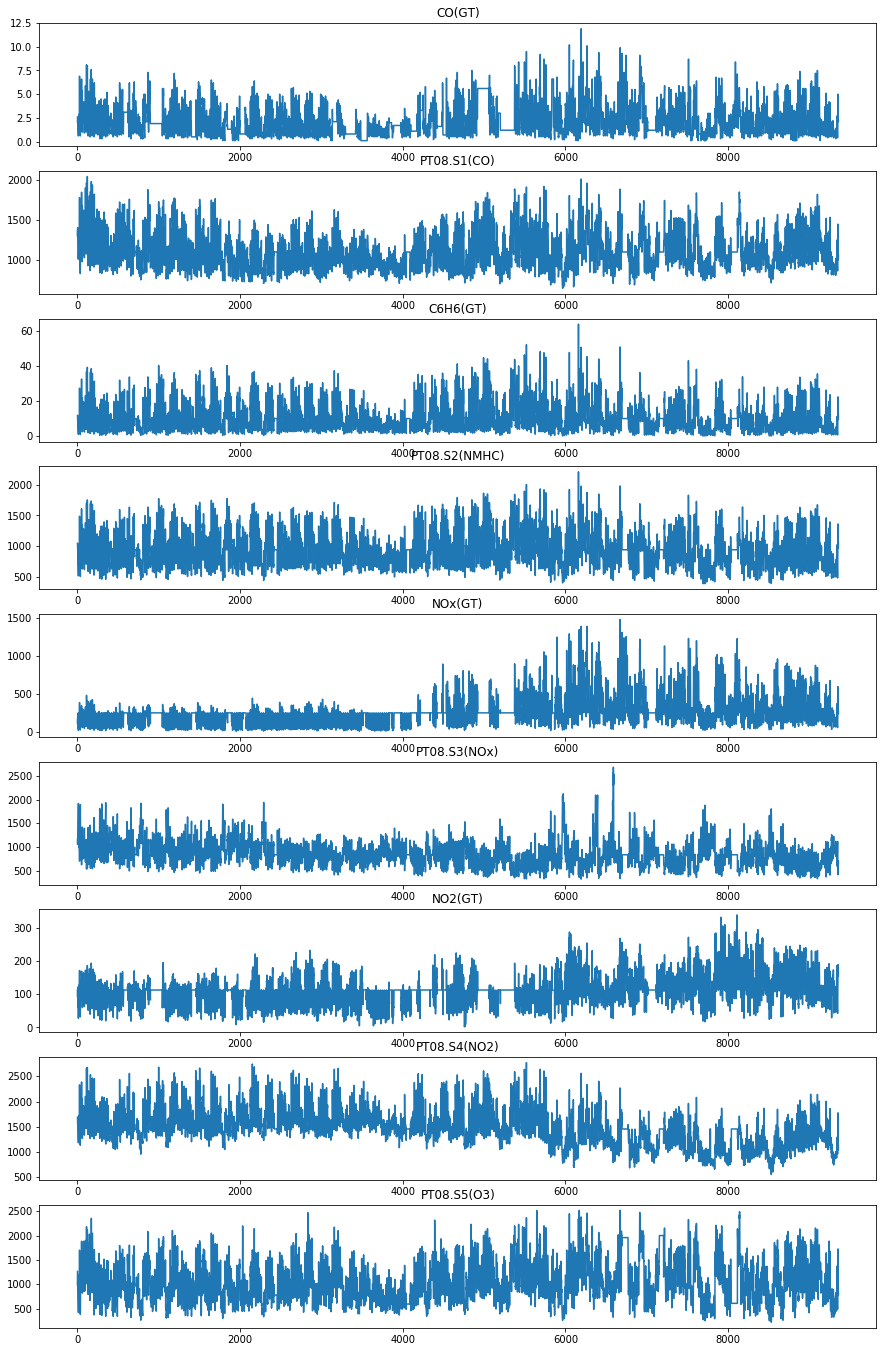

In [293]:
fig, axes = plt.subplots(9,1, figsize=(15,24))
axes[0].plot(data['CO(GT)'])
axes[0].set_title ('CO(GT)')
axes[1].plot(data['PT08.S1(CO)'])
axes[1].set_title ('PT08.S1(CO)')
axes[2].plot(data['C6H6(GT)'])
axes[2].set_title ('C6H6(GT)')
axes[3].plot(data['PT08.S2(NMHC)'])
axes[3].set_title ('PT08.S2(NMHC)')
axes[4].plot(data['NOx(GT)'])
axes[4].set_title ('NOx(GT)')
axes[5].plot(data['PT08.S3(NOx)'])
axes[5].set_title ('PT08.S3(NOx)')
axes[6].plot(data['NO2(GT)'])
axes[6].set_title ('NO2(GT)')
axes[7].plot(data['PT08.S4(NO2)'])
axes[7].set_title ('PT08.S4(NO2)')
axes[8].plot(data['PT08.S5(O3)'])
axes[8].set_title ('PT08.S5(O3)')
plt.savefig('stat.jpg')

In [294]:
data.corr()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.761472  0.782236       0.770222  0.717820   
PT08.S1(CO)    0.761472     1.000000  0.883821       0.892972  0.615974   
C6H6(GT)       0.782236     0.883821  1.000000       0.981962  0.616880   
PT08.S2(NMHC)  0.770222     0.892972  0.981962       1.000000  0.601812   
NOx(GT)        0.717820     0.615974  0.616880       0.601812  1.000000   
PT08.S3(NOx)  -0.611819    -0.771918 -0.735711      -0.796687 -0.563259   
NO2(GT)        0.613539     0.562997  0.536178       0.561421  0.763133   
PT08.S4(NO2)   0.523931     0.682874  0.765717       0.777235  0.205526   
PT08.S5(O3)    0.736996     0.854903  0.822963       0.837093  0.707065   
T              0.001491     0.047721  0.195183       0.236830 -0.252328   
RH             0.041938     0.112097 -0.060293      -0.088372  0.187122   
AH             0.023295     0.132316  0.164179       0.182754 -0.148436   
Year          -0.033857     0.025208 -0.129270      -0.142679  0.202394   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)            -0.611819  0.613539      0.523931     0.736996  0.001491   
PT08.S1(CO)       -0.771918  0.562997      0.682874     0.854903  0.047721   
C6H6(GT)          -0.735711  0.536178      0.765717     0.822963  0.195183   
PT08.S2(NMHC)     -0.796687  0.561421      0.777235     0.837093  0.236830   
NOx(GT)           -0.563259  0.763133      0.205526     0.707065 -0.252328   
PT08.S3(NOx)       1.000000 -0.569535     -0.538460    -0.757207 -0.142427   
NO2(GT)           -0.569535  1.000000      0.140940     0.618029 -0.185589   
PT08.S4(NO2)      -0.538460  0.140940      1.000000     0.561938  0.550867   
PT08.S5(O3)       -0.757207  0.618029      0.561938     1.000000 -0.044840   
T                 -0.142427 -0.185589      0.550867    -0.044840  1.000000   
RH                -0.055487 -0.091529     -0.031483     0.137780 -0.570698   
AH                -0.226866 -0.318978      0.615656     0.055469  0.654827   
Year              -0.142517  0.359471     -0.484910     0.041728 -0.525436   

                     RH        AH      Year  
CO(GT)         0.041938  0.023295 -0.033857  
PT08.S1(CO)    0.112097  0.132316  0.025208  
C6H6(GT)      -0.060293  0.164179 -0.129270  
PT08.S2(NMHC) -0.088372  0.182754 -0.142679  
NOx(GT)        0.187122 -0.148436  0.202394  
PT08.S3(NOx)  -0.055487 -0.226866 -0.142517  
NO2(GT)       -0.091529 -0.318978  0.359471  
PT08.S4(NO2)  -0.031483  0.615656 -0.484910  
PT08.S5(O3)    0.137780  0.055469  0.041728  
T             -0.570698  0.654827 -0.525436  
RH             1.000000  0.180548  0.085545  
AH             0.180548  1.000000 -0.524179  
Year           0.085545 -0.524179  1.000000

In [295]:
target_column = ['RH','AH']
indep_col = list(set(list(feature_columns)) - set(list(target_column)))


In [296]:
print(data['AH'])
print(data['RH'])

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
5       0.784772
6       0.760312
7       0.770238
8       0.764819
9       0.751657
10      0.746495
11      0.736560
12      0.735295
13      0.741736
14      0.740795
15      0.769111
16      0.755183
17      0.735161
18      0.795054
19      0.839268
20      0.873589
21      0.877784
22      0.856938
23      0.818501
24      0.806544
25      0.831921
26      0.813314
27      0.741924
28      0.690484
29      0.665744
          ...   
9327    0.620458
9328    0.587528
9329    0.567283
9330    0.559414
9331    0.530155
9332    0.500166
9333    0.462436
9334    0.419179
9335    0.386566
9336    0.594491
9337    0.760784
9338    0.807281
9339    0.864238
9340    0.857933
9341    0.849727
9342    0.827454
9343    0.805778
9344    0.792730
9345    0.788769
9346    0.774275
9347    0.754964
9348    0.753129
9349    0.744608
9350    0.755337
9351    0.748652
9352    0.756824
9353    0.711864
9354    0.6406

# Linearity Test

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


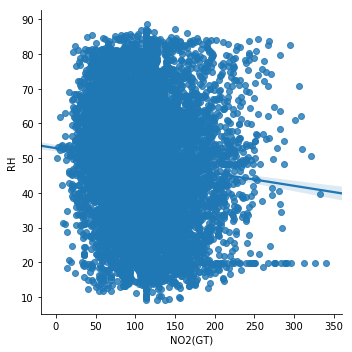

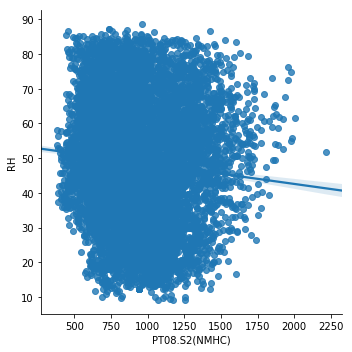

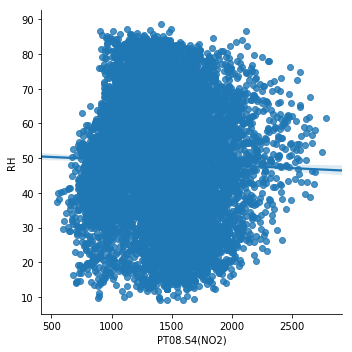

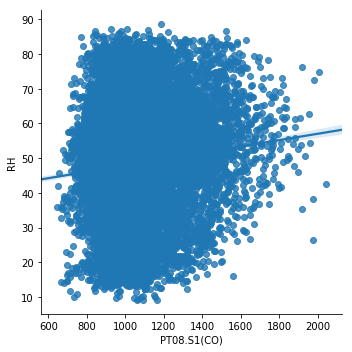

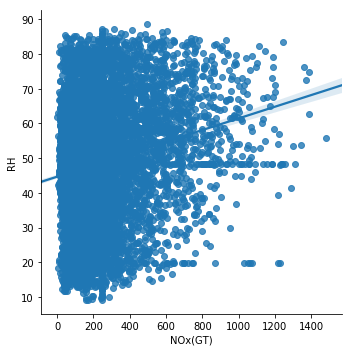

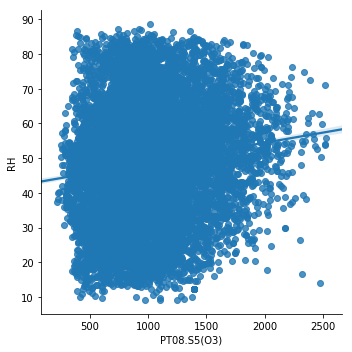

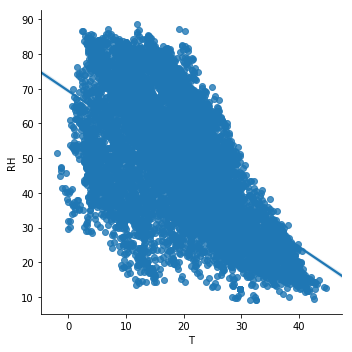

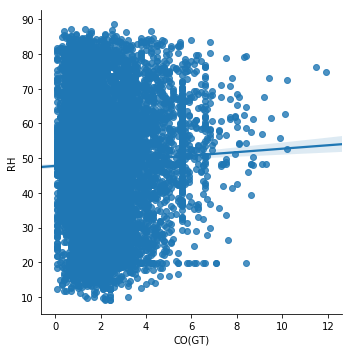

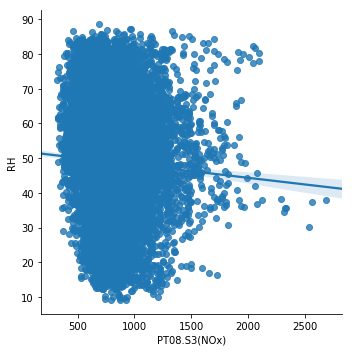

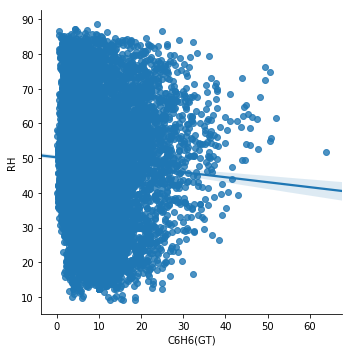

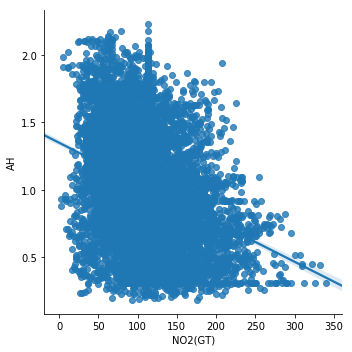

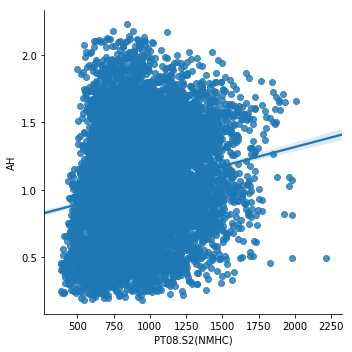

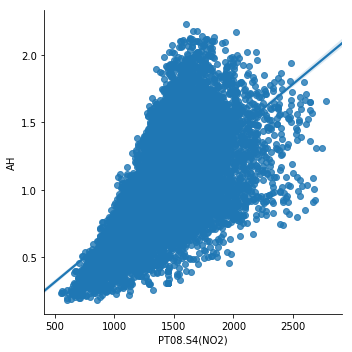

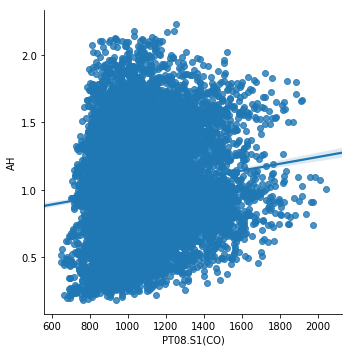

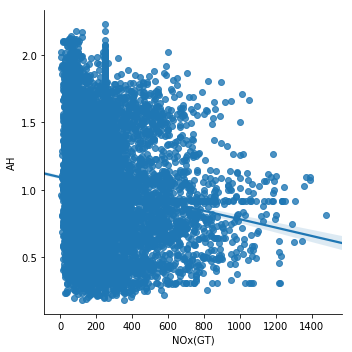

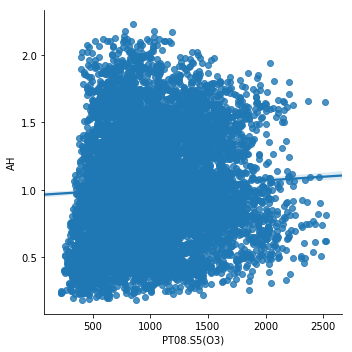

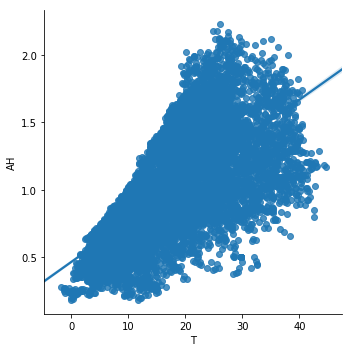

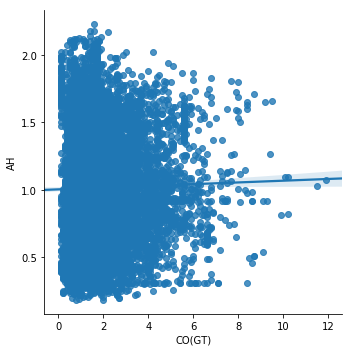

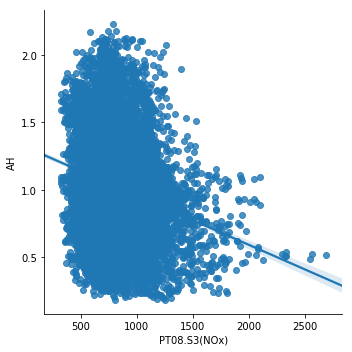

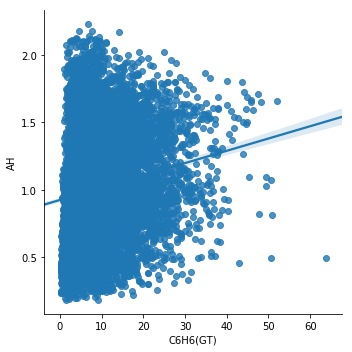

In [297]:
for i in indep_col:
    sns.lmplot(x=i,y='RH',data=data)
    plt.savefig(i+'.jpg')
for i in indep_col:
    sns.lmplot(x=i,y='AH',data=data)
    plt.savefig(i+'AH'+'.jpg')

# Normality Test

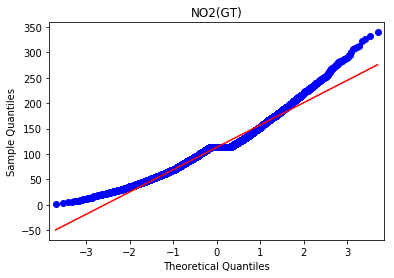

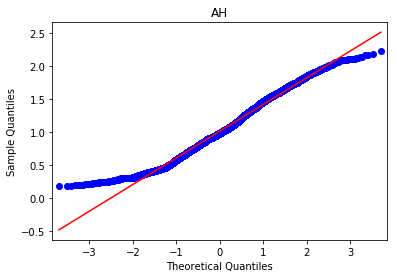

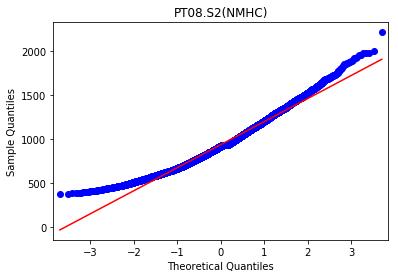

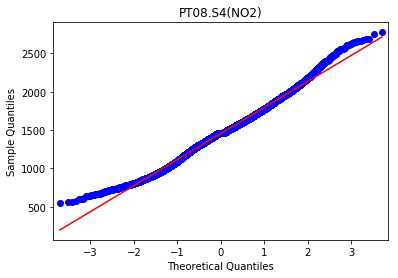

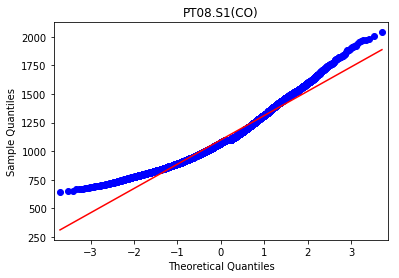

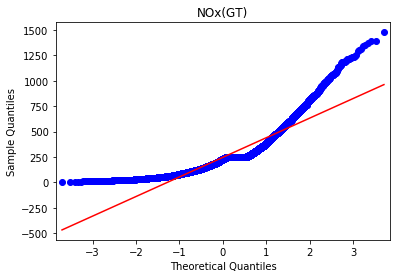

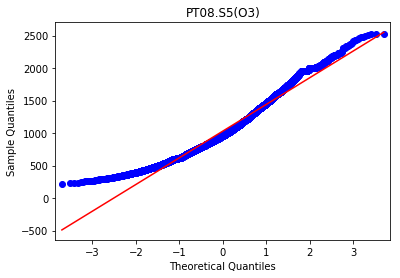

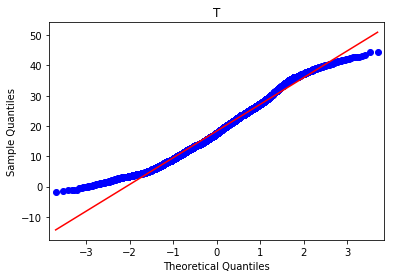

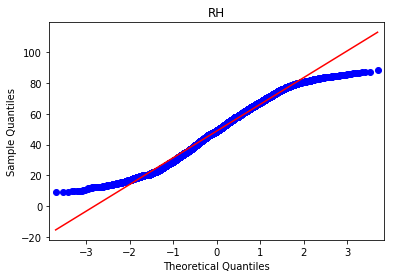

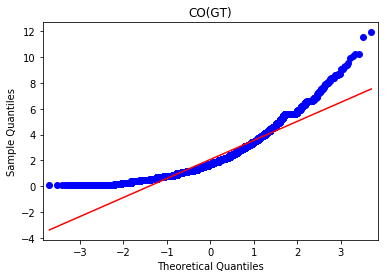

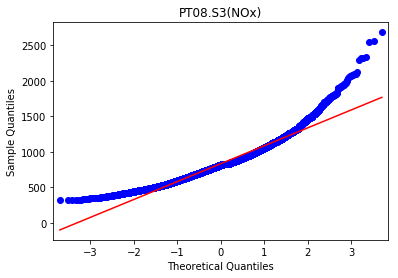

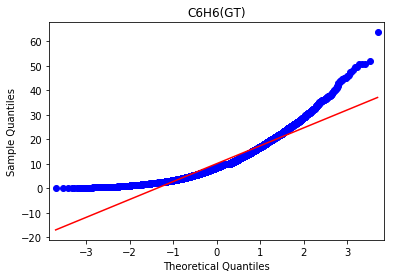

In [298]:
from statsmodels.graphics.gofplots import qqplot
for i in feature_columns:
    qqplot(data[i], line='s')
    plt.title(i)
    plt.savefig('normal'+i+'.jpg')

In [299]:
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

In [300]:
y = data[['RH','AH']]
x = data[indep_col]
utils.multiclass.type_of_target(y.iloc[:,0])
utils.multiclass.type_of_target(x.iloc[:,0])
print(y)

             RH        AH
0     48.875001  0.757754
1     47.700000  0.725487
2     53.975000  0.750239
3     60.000000  0.786713
4     59.575001  0.788794
5     59.175000  0.784772
6     56.775000  0.760312
7     60.000000  0.770238
8     59.674999  0.764819
9     60.200001  0.751657
10    60.474999  0.746495
11    56.175000  0.736560
12    58.125000  0.735295
13    59.599999  0.741736
14    57.425000  0.740795
15    60.599998  0.769111
16    58.350000  0.755183
17    57.925000  0.735161
18    66.774999  0.795054
19    76.425001  0.839268
20    81.150000  0.873589
21    79.799999  0.877784
22    71.150002  0.856938
23    67.624998  0.818501
24    64.174999  0.806544
25    69.300001  0.831921
26    67.750000  0.813314
27    63.974999  0.741924
28    63.400000  0.690484
29    60.824999  0.665744
...         ...       ...
9327  30.675000  0.620458
9328  23.725000  0.587528
9329  19.275000  0.567283
9330  16.450000  0.559414
9331  13.700000  0.530155
9332  13.075000  0.500166
9333  11.075

# Outlier Detection

In [301]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
print(z)
z1 = np.abs(stats.zscore(x))
print(z1)

[[1.71982196e-03 4.07085784e-01 6.95030055e-01 ... 3.52314658e-01
  8.77450011e-01 2.46331061e-01]
 [4.79984419e-01 6.01076765e-02 3.02364390e-01 ... 5.59256163e-02
  1.34422306e+00 9.39223090e-02]
 [2.10546827e-02 8.44198190e-04 2.89840344e-01 ... 8.01544752e-02
  1.21014995e+00 1.48611906e-01]
 ...
 [1.40346711e+00 4.72084437e-01 6.34728903e-01 ... 2.16234567e-01
  9.22109052e-01 3.13820688e-01]
 [9.70751526e-01 8.20925153e-02 1.22335905e+00 ... 1.21144294e-02
  5.31807334e-01 7.33772449e-02]
 [1.24404558e+00 4.13776822e-01 9.65511048e-01 ... 8.01544752e-02
  7.20502821e-01 2.53224492e-01]]
[[1.71982196e-03 4.07085784e-01 6.95030055e-01 ... 3.52314658e-01
  8.77450011e-01 2.46331061e-01]
 [4.79984419e-01 6.01076765e-02 3.02364390e-01 ... 5.59256163e-02
  1.34422306e+00 9.39223090e-02]
 [2.10546827e-02 8.44198190e-04 2.89840344e-01 ... 8.01544752e-02
  1.21014995e+00 1.48611906e-01]
 ...
 [1.40346711e+00 4.72084437e-01 6.34728903e-01 ... 2.16234567e-01
  9.22109052e-01 3.13820688e-01]

In [302]:
threshold = 3
print(np.where(z > 3))
print(y.shape)
print(x.shape)

(array([   9,   10,   11,   12,   25,   25,   33,   34,   35,   36,   50,
         50,   50,   97,   98,  110,  111,  111,  111,  111,  112,  120,
        120,  121,  121,  121,  121,  121,  122,  122,  147,  159,  159,
        159,  159,  169,  169,  169,  169,  169,  170,  170,  170,  170,
        171,  183,  183,  183,  203,  206,  207,  273,  274,  275,  298,
        299,  346,  347,  348,  440,  489,  490,  638,  638,  638,  657,
        658,  659,  775,  778,  779,  780,  781,  864,  865,  865,  865,
        866,  998,  998,  998, 1008, 1009, 1033, 1057, 1057, 1091, 1092,
       1113, 1114, 1190, 1190, 1190, 1190, 1201, 1201, 1201, 1201, 1353,
       1354, 1454, 1454, 1489, 1502, 1502, 1502, 1646, 1646, 1646, 1646,
       1646, 1670, 1670, 1694, 1694, 1694, 1785, 1786, 1787, 1839, 1839,
       1862, 1993, 2150, 2150, 2174, 2174, 2198, 2288, 2289, 2290, 2291,
       2342, 2630, 2630, 2654, 2654, 2688, 2726, 2832, 3158, 3158, 3206,
       3206, 4190, 4190, 4238, 4238, 4359, 4392, 4

In [303]:
x.shape

(9357, 10)

In [304]:
ss = StandardScaler()
x_std = ss.fit_transform(x)

In [305]:
x_std

array([[-1.71982196e-03,  4.07085784e-01,  6.95030055e-01, ...,
         3.52314658e-01,  8.77450011e-01,  2.46331061e-01],
       [-4.79984419e-01,  6.01076765e-02,  3.02364390e-01, ...,
        -5.59256163e-02,  1.34422306e+00, -9.39223090e-02],
       [ 2.10546827e-02,  8.44198190e-04,  2.89840344e-01, ...,
         8.01544752e-02,  1.21014995e+00, -1.48611906e-01],
       ...,
       [ 1.40346711e+00,  4.72084437e-01, -6.34728903e-01, ...,
         2.16234567e-01, -9.22109052e-01,  3.13820688e-01],
       [ 9.70751526e-01,  8.20925153e-02, -1.22335905e+00, ...,
         1.21144294e-02, -5.31807334e-01, -7.33772449e-02],
       [ 1.24404558e+00,  4.13776822e-01, -9.65511048e-01, ...,
         8.01544752e-02, -7.20502821e-01,  2.53224492e-01]])

Normality Test

In [306]:
from scipy import stats
k2, p = stats.normaltest(x)
print(p)
for i in range(len(p)):
    print(x.columns[i],'  ',p[i])
k2, p = stats.normaltest(y)
for i in range(len(p)):
    print(y.columns[i],'  ',p[i])

[8.38202622e-183 5.15465103e-100 3.10932749e-018 1.78863601e-173
 0.00000000e+000 4.48989102e-125 8.87719809e-064 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
NO2(GT)    8.382026215464602e-183
PT08.S2(NMHC)    5.154651033295069e-100
PT08.S4(NO2)    3.1093274946139267e-18
PT08.S1(CO)    1.7886360129305134e-173
NOx(GT)    0.0
PT08.S5(O3)    4.489891015439565e-125
T    8.877198092891439e-64
CO(GT)    0.0
PT08.S3(NOx)    0.0
C6H6(GT)    0.0
RH    7.022315598570015e-178
AH    2.1014760517340424e-74


In [307]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#  OLS Regression

In [308]:
x2 = sm.add_constant(x_train)
est = sm.OLS(y_train.iloc[:,0],x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1824.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:31:32   Log-Likelihood:                -23628.
No. Observations:                6549   AIC:                         4.728e+04
Df Residuals:                    6538   BIC:                         4.735e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            92.9243      2.574     36.107

In [309]:
z2 = sm.add_constant(x_train)
mst = sm.OLS(y_train.iloc[:,1],z2)
mst2 = mst.fit()
print(mst2.summary())

                            OLS Regression Results                            
Dep. Variable:                     AH   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     2581.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:31:33   Log-Likelihood:                 1854.9
No. Observations:                6549   AIC:                            -3688.
Df Residuals:                    6538   BIC:                            -3613.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6518      0.053     31.425

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Residuals')

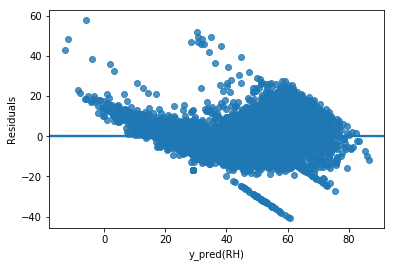

In [310]:
x3 = sm.add_constant(x_train)
y_train_pred1 = est2.predict(x3)
resid1 = (y_train.iloc[:,0] - y_train_pred1)
sns.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(RH)")
plt.ylabel("Residuals")

c:\users\santosh chirag\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Residuals')

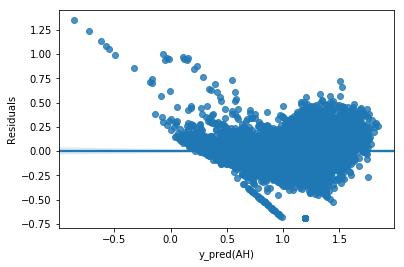

In [311]:
z3 = sm.add_constant(x_train)
y_train_pred2 = mst2.predict(z3)
resid2 = (y_train.iloc[:,1] - y_train_pred2)
sns.regplot(y_train_pred2,resid2)
plt.xlabel("y_pred(AH)")
plt.ylabel("Residuals")

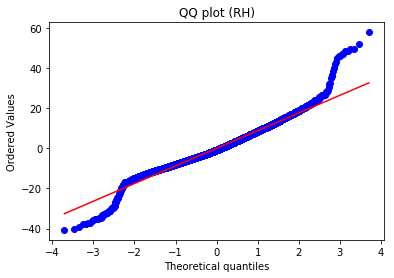

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [312]:
import pylab
stats.probplot(resid1, dist="norm", plot=pylab)
pylab.title("QQ plot (RH)")
pylab.show()
pylab.figure()

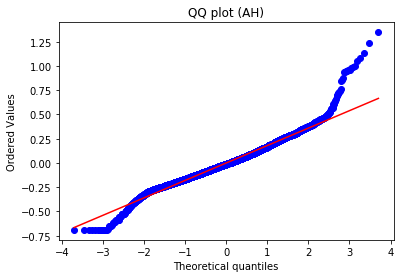

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [313]:
import pylab
stats.probplot(resid2, dist="norm", plot=pylab)
pylab.title("QQ plot (AH)")
pylab.show()
pylab.figure()

In [314]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(x_train.columns)

Index(['NO2(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S1(CO)', 'NOx(GT)',
       'PT08.S5(O3)', 'T', 'CO(GT)', 'PT08.S3(NOx)', 'C6H6(GT)'],
      dtype='object')


In [315]:
vif

[23.434629749182516,
 364.5254744021439,
 111.16408936912678,
 173.03427630142346,
 10.40798214044889,
 39.16755643657675,
 12.744706216874096,
 10.549284665785503,
 17.539905057308477,
 46.99068503730334]

<StemContainer object of 3 artists>

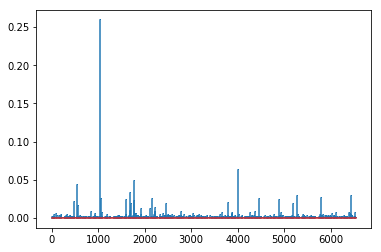

In [316]:
influence = est2.get_influence()

(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")


In [317]:
from statsmodels.tsa.stattools import adfuller
def adfu(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag = 'AIC')
    rolling_mean = ts.rolling(window = 24).mean()
    rolling_std = ts.rolling(window = 24).std()    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adfu(y.iloc[:,0])
adfu(y.iloc[:,1])


Results of Dickey-Fuller Test:
Test Statistic                -7.317409e+00
p-value                        1.219023e-10
#Lags Used                     3.800000e+01
Number of Observations Used    9.318000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -5.094234
p-value                           0.000014
#Lags Used                       25.000000
Number of Observations Used    9331.000000
Critical Value (1%)              -3.431051
Critical Value (5%)              -2.861850
Critical Value (10%)             -2.566935
dtype: float64


In [318]:
for i in range(x.shape[1]):
    print(adfu(x.iloc[:,i]))
print(x.columns)

Results of Dickey-Fuller Test:
Test Statistic                -8.188392e+00
p-value                        7.786800e-13
#Lags Used                     3.200000e+01
Number of Observations Used    9.324000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -1.041342e+01
p-value                        1.779690e-18
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -6.313850e+00
p-value                        3.185933e-08
#Lags Used                     3.700000e+01
Number of Observations Used    9.319000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -

In [319]:
data_temp = data.copy()

# PCA

In [320]:
from sklearn.decomposition import PCA


In [321]:
scaler = StandardScaler().fit(x)
X_scaled = pd.DataFrame(scaler.transform(x), index=x.index.values, columns=x.columns.values)
scaler = StandardScaler().fit(y)
Y_scaled = pd.DataFrame(scaler.transform(y), index=y.index.values, columns=y.columns.values)
# X_test_scaled = pd.DataFrame(scaler.transform(x_test), index=x_test.index.values, columns=x_test.columns.values)
pca = PCA(n_components=3)
fit = pca.fit(X_scaled)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)
print(fit)
x_PCA = pca.fit_transform(X_scaled)
print(x_PCA)
pca = PCA(n_components=2)
fit = pca.fit(Y_scaled)
y_PCA = pca.fit_transform(Y_scaled)
print(y_PCA.shape)

Explained Variance: [0.64828141 0.17600708 0.05268732]
[[ 0.27110796  0.37656335  0.27426527  0.36547799  0.29419903  0.35724245
   0.04324239  0.33653039 -0.32937515  0.37164378]
 [ 0.37345438 -0.14107515 -0.48135325 -0.02688657  0.38249013  0.08929206
  -0.65464579  0.09692591  0.0279258  -0.12328186]
 [ 0.59315086 -0.06406409 -0.18060611 -0.28003944  0.24030303 -0.20537646
   0.62800532 -0.00861561 -0.13826007 -0.13971899]]
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[ 0.77164011 -0.1557352  -1.20864904]
 [-0.48432959 -0.23890301 -1.27555269]
 [ 0.00808698  0.14629047 -1.20746104]
 ...
 [ 1.11573156  0.18185983  1.58053639]
 [-0.25281193  0.12363376  1.83047668]
 [ 0.42832188  0.06500419  1.84229492]]
(9357, 2)


In [322]:
xpca_train,xpca_test,ypca_train,ypca_test =  train_test_split(x_PCA, y_PCA, test_size=0.3, random_state=42)

In [323]:
print(xpca_train)
print(xpca_test)
print(ypca_train)
print(ypca_test)
print(ypca_train.shape)

[[ 2.65551015 -1.81036688 -0.54422747]
 [-0.40784222  0.40665244 -0.17226253]
 [ 2.86546879 -1.48284798  0.58380326]
 ...
 [ 3.87596375 -1.18179067 -0.73678667]
 [ 2.92474059 -0.76333553 -0.77812446]
 [ 3.63627265  1.53626476  0.22872742]]
[[-1.54199774 -1.25248028  0.23388406]
 [-2.08895357 -1.31708503 -0.29407497]
 [ 1.50445229 -0.21834974  0.47563741]
 ...
 [-0.06475713  1.67025565 -0.7717456 ]
 [ 1.50758114 -1.70528961  0.33179429]
 [-0.30586668  0.47128324 -0.11268976]]
[[ 1.27254961  1.15763085]
 [ 1.10061586 -0.91719072]
 [ 0.59793839  1.74210387]
 ...
 [ 1.64324785  0.61763231]
 [-0.94661156  0.12624652]
 [ 0.01687194 -0.58497424]]
[[-0.33576467  0.80228872]
 [ 0.68519239  0.5987966 ]
 [-0.68249157  0.66744657]
 ...
 [ 0.96186943 -2.0175676 ]
 [-1.83859684  0.82135937]
 [ 0.40206773 -0.531867  ]]
(6549, 2)


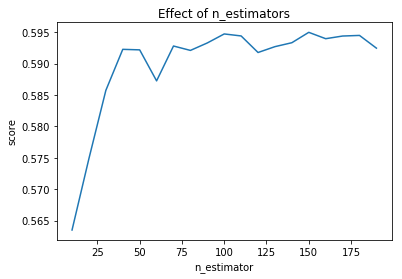

In [324]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(xpca_train, ypca_train)
    scores.append(model.score(xpca_test, ypca_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [325]:
importances = list(model.feature_importances_)
importances

[0.18433835565327092, 0.49934723195687153, 0.31631441238985775]

In [326]:
scores

[0.5634942900786823,
 0.5748845157827663,
 0.5857351390439035,
 0.5922659460332246,
 0.5921827648796838,
 0.5872455631022259,
 0.5927954916347643,
 0.5920950495102044,
 0.593284358068344,
 0.59471689451131,
 0.5943981126708865,
 0.5917621304609307,
 0.5926942105573872,
 0.5933210249741065,
 0.5949733419719938,
 0.5939608686858382,
 0.5943847157471674,
 0.5944815301317294,
 0.5924566248402319]

In [327]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Test Variance score: 0.888911
Test Variance score: 0.894558
Test Variance score: 0.899358
Test Variance score: 0.899334
Test Variance score: 0.901984
Test Variance score: 0.902229
Test Variance score: 0.901129
Test Variance score: 0.901505
Test Variance score: 0.901434
Test Variance score: 0.902525
Test Variance score: 0.902603
Test Variance score: 0.903182
Test Variance score: 0.902155
Test Variance score: 0.903152
Test Variance score: 0.903140
Test Variance score: 0.903690
Test Variance score: 0.902551
Test Variance score: 0.901860
Test Variance score: 0.902444


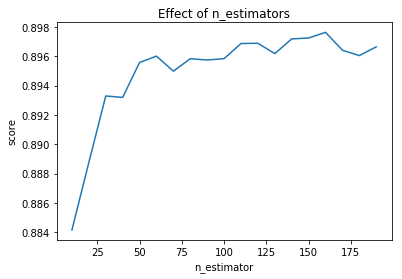

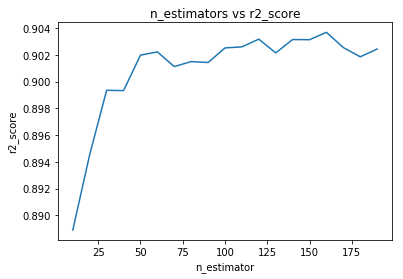

In [328]:
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
r_score = []
mean_squared_error1 = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
    y_predicted = model.predict(x_test)
    print('Test Variance score: %f' % r2_score(y_test, y_predicted))
    r_score.append(r2_score(y_test,y_predicted))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.figure()
plt.title("n_estimators vs r2_score")
plt.xlabel("n_estimator")
plt.ylabel("r2_score")
plt.plot(estimators, r_score)


In [329]:
scores

[0.8841520087697451,
 0.8887576060899404,
 0.8933012816966227,
 0.8932032474162367,
 0.8955879977757406,
 0.8960213129309047,
 0.894996133204324,
 0.8958440317771037,
 0.8957589226307675,
 0.8958490889737992,
 0.8968828177942463,
 0.896899512693049,
 0.8961925154479438,
 0.8971983180310024,
 0.897257934409096,
 0.89764549720124,
 0.8964207135179397,
 0.8960603001427616,
 0.8966575925351155]

NO2(GT)       0.07812180312054559
PT08.S2(NMHC)       0.0468742246325764
PT08.S4(NO2)       0.1483595433153095
PT08.S1(CO)       0.019292969018854463
NOx(GT)       0.03001167988997244
PT08.S5(O3)       0.04635480866142602
T       0.4997110965495801
CO(GT)       0.017625171614266865
PT08.S3(NOx)       0.06459693936489377
C6H6(GT)       0.04905176383257493


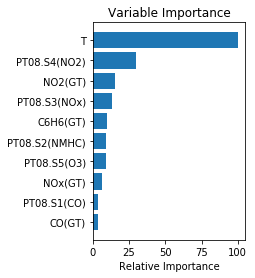

In [330]:
importances = list(model.feature_importances_)
columns = list(x.columns)
for i in range(len(columns)):
    print(columns[i],'     ',importances[i])
feature_importance = 100.0 * (importances / max(importances))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
col = ['T','PT08.S4(NO2)','NO2(GT)','PT08.S3(NOx)','C6H6(GT)','PT08.S2(NMHC)','PT08.S5(O3)','NOx(GT)','PT08.S1(CO)','CO(GT)']
plt.yticks(pos, reversed(col))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [331]:
type(importances)
importances = sorted(importances, reverse = True)
print(importances)

[0.4997110965495801, 0.1483595433153095, 0.07812180312054559, 0.06459693936489377, 0.04905176383257493, 0.0468742246325764, 0.04635480866142602, 0.03001167988997244, 0.019292969018854463, 0.017625171614266865]


In [332]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train) 
print('Coefficients: \n', reg.coef_)
print(x.columns)
print('Variance score: {}'.format(reg.score(x_test, y_test)))
y_pred = reg.predict(x_test)

Coefficients: 
 [[-1.60427075e-01 -6.53760284e-02  5.26389015e-02  9.90993150e-03
   4.21687016e-02  8.74899456e-04 -1.74831852e+00 -6.78736334e-01
  -3.03696531e-02 -4.56647206e-01]
 [-3.21131827e-03 -1.89558928e-03  1.18673663e-03 -4.62102606e-05
   7.95118339e-04  1.53771263e-05  1.50207473e-02 -1.19498543e-02
  -8.50336083e-04  7.92867714e-03]]
Index(['NO2(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S1(CO)', 'NOx(GT)',
       'PT08.S5(O3)', 'T', 'CO(GT)', 'PT08.S3(NOx)', 'C6H6(GT)'],
      dtype='object')
Variance score: 0.7270052645183276


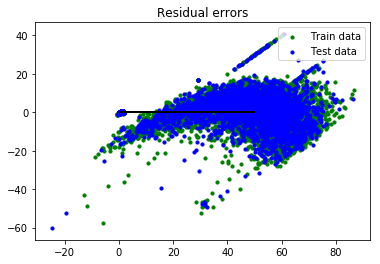

In [333]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [334]:
print(r2_score(y_test,y_pred))

0.7587165188730305


# Factor Analysis

In [335]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(x.values)

In [336]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x)
print(chi_square_value,p_value)

121299.59066771198 0.0


In [337]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x)
print(kmo_model)

0.865224518839246


In [338]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(10)
fa.analyze(x)
print(fa.loadings)
ev, v = fa.get_eigenvalues()
ev

                Factor1   Factor2   Factor3
NO2(GT)       -0.103328  0.105664  0.968154
PT08.S2(NMHC)  0.884768  0.067284  0.138799
PT08.S4(NO2)   1.000797  0.209943 -0.350696
PT08.S1(CO)    0.914390 -0.157070  0.057602
NOx(GT)        0.081499 -0.048269  0.826327
PT08.S5(O3)    0.717645 -0.149362  0.258892
T              0.019187  1.023334  0.090561
CO(GT)         0.524489 -0.015890  0.404135
PT08.S3(NOx)  -0.556832 -0.087344 -0.331501
C6H6(GT)       0.905598  0.005731  0.092469


Original_Eigenvalues
0              6.482814
1              1.760071
2              0.526873
3              0.415380
4              0.227362
5              0.206325
6              0.150146
7              0.118467
8              0.101563
9              0.010999

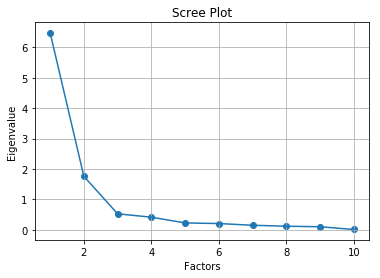

Factor1   Factor2   Factor3
SS Loadings     4.558478  1.164205  2.122704
Proportion Var  0.455848  0.116421  0.212270
Cumulative Var  0.455848  0.572268  0.784539

In [339]:
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
fa.get_factor_variance()


In [340]:
fa_1 = FactorAnalyzer(2)
fa_1.analyze(x)

In [341]:
ev, v = fa_1.get_eigenvalues()
print(ev)
print(fa_1.get_factor_variance())
print(fa_1.loadings)


   Original_Eigenvalues
0              6.482814
1              1.760071
2              0.526873
3              0.415380
4              0.227362
5              0.206325
6              0.150146
7              0.118467
8              0.101563
9              0.010999
                 Factor1   Factor2   Factor3
SS Loadings     4.558478  1.164205  2.122704
Proportion Var  0.455848  0.116421  0.212270
Cumulative Var  0.455848  0.572268  0.784539
                Factor1   Factor2   Factor3
NO2(GT)       -0.103328  0.105664  0.968154
PT08.S2(NMHC)  0.884768  0.067284  0.138799
PT08.S4(NO2)   1.000797  0.209943 -0.350696
PT08.S1(CO)    0.914390 -0.157070  0.057602
NOx(GT)        0.081499 -0.048269  0.826327
PT08.S5(O3)    0.717645 -0.149362  0.258892
T              0.019187  1.023334  0.090561
CO(GT)         0.524489 -0.015890  0.404135
PT08.S3(NOx)  -0.556832 -0.087344 -0.331501
C6H6(GT)       0.905598  0.005731  0.092469


In [342]:
corrm = x.corr()
corrm

NO2(GT)  PT08.S2(NMHC)  PT08.S4(NO2)  PT08.S1(CO)   NOx(GT)  \
NO2(GT)        1.000000       0.561421      0.140940     0.562997  0.763133   
PT08.S2(NMHC)  0.561421       1.000000      0.777235     0.892972  0.601812   
PT08.S4(NO2)   0.140940       0.777235      1.000000     0.682874  0.205526   
PT08.S1(CO)    0.562997       0.892972      0.682874     1.000000  0.615974   
NOx(GT)        0.763133       0.601812      0.205526     0.615974  1.000000   
PT08.S5(O3)    0.618029       0.837093      0.561938     0.854903  0.707065   
T             -0.185589       0.236830      0.550867     0.047721 -0.252328   
CO(GT)         0.613539       0.770222      0.523931     0.761472  0.717820   
PT08.S3(NOx)  -0.569535      -0.796687     -0.538460    -0.771918 -0.563259   
C6H6(GT)       0.536178       0.981962      0.765717     0.883821  0.616880   

               PT08.S5(O3)         T    CO(GT)  PT08.S3(NOx)  C6H6(GT)  
NO2(GT)           0.618029 -0.185589  0.613539     -0.569535  0.536178  
PT08.S2(NMHC)     0.837093  0.236830  0.770222     -0.796687  0.981962  
PT08.S4(NO2)      0.561938  0.550867  0.523931     -0.538460  0.765717  
PT08.S1(CO)       0.854903  0.047721  0.761472     -0.771918  0.883821  
NOx(GT)           0.707065 -0.252328  0.717820     -0.563259  0.616880  
PT08.S5(O3)       1.000000 -0.044840  0.736996     -0.757207  0.822963  
T                -0.044840  1.000000  0.001491     -0.142427  0.195183  
CO(GT)            0.736996  0.001491  1.000000     -0.611819  0.782236  
PT08.S3(NOx)     -0.757207 -0.142427 -0.611819      1.000000 -0.735711  
C6H6(GT)          0.822963  0.195183  0.782236     -0.735711  1.000000

In [343]:
eigen_values = np.linalg.eigvals(corrm)
print(eigen_values)
eigen_values_cumvar = (eigen_values/10).cumsum()
print(eigen_values_cumvar)

[6.48281411 1.76007079 0.52687317 0.41538029 0.01099883 0.22736213
 0.20632524 0.1501459  0.10156285 0.11846668]
[0.64828141 0.82428849 0.87697581 0.91851384 0.91961372 0.94234993
 0.96298246 0.97799705 0.98815333 1.        ]


In [344]:
Factor_Analysis = FactorAnalyzer()
Factor_Analysis.analyze(x,n_factors=4,rotation='varimax',method='ml')

In [345]:
loadings = Factor_Analysis.loadings
loadings

Factor1   Factor2   Factor3   Factor4
NO2(GT)        0.245677 -0.102703  0.762700  0.212014
PT08.S2(NMHC)  0.867775  0.171821  0.421193  0.168409
PT08.S4(NO2)   0.770448  0.446725  0.043618  0.091084
PT08.S1(CO)    0.777560 -0.009076  0.426697  0.264350
NOx(GT)        0.290956 -0.154306  0.884593  0.034160
PT08.S5(O3)    0.661551 -0.065486  0.543830  0.284721
T              0.159564  0.969817 -0.169311  0.018212
CO(GT)         0.584358  0.010877  0.608930  0.043435
PT08.S3(NOx)  -0.572996 -0.120531 -0.446290 -0.525115
C6H6(GT)       0.893076  0.127648  0.424018  0.036974